In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('seaborn')
import seaborn as sns
sns.set_context('notebook')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
deaths = pd.read_csv(url)
deaths.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329,353,356,363,373,382
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,7,7,7,7,8,8,9,10,12,13,13,14,16,17,18,19,20,20,22,24,24,24,27,28,28,29,30,30,32,33,33,35,39,40,40,42,43,44,45,46,47,48,49,52,55,60,61
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,10,12,12,16,18,21,21,21,22,23,2

In [4]:
deaths.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 
                            'Lat': 'lat', 'Long': 'long'}, inplace=True)
deaths.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3


# Select Countries

In [5]:
countries = deaths.loc[(deaths['country'] == 'US') | 
                       (deaths['country'] == 'Korea, South') |
                       (deaths['country'] == 'Spain') | 
                       (deaths['country'] == 'Italy')]
countries

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,34,52,79,107,148,197,233,366,463,631,827,827,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915,14681,15362,15887,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977,27359,27682,27967,28236,28710,28884,29079,29315,29684,29958,30201,30395,30560,30739,30911,31106,31368,31610,31763,31908,32007
143,NaN,"Korea, South",36.0000,128.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,17,28,28,35,35,42,44,50,53,54,60,66,66,72,75,75,81,84,91,94,102,111,111,120,126,131,139,144,152,158,162,165,169,174,177,183,186,192,200,204,208,211,214,217,222,225,229,230,232,234,236,237,238,240,240,242,243,244,246,247,248,250,250,252,254,255,256,256,256,256,256,258,259,260,260,262,262,263,263
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,10,17,28,35,54,55,133,195,289,342,533,623,830,1043,1375,1772,2311,2808,3647,4365,5138,5982,6803,7716,8464,9387,10348,11198,11947,12641,13341,14045,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002,20043,20453,20852,21282,21717,22157,22524,22902,23190,23521,23822,24275,24543,24543,25100,25264,25428,25613,25857,26070,26299,26478,26621,26744,26920,27104,27321,27459,27563,27563,27709
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,7,11,12,14,17,21,22,28,36,41,49,58,73,99,133,164,258,349,442,586,786,1008,1316,1726,2265,2731,3420,4192,5367,6501,7921,9246,10855,12375,13894,16191,18270,20255,22333,24342,26086,27870,30262,32734,34827,37411,39753,40945,42659,45086,47412,49724,51493,53755,54881,56219,58355,60967,62996,64943,66369,67682,68922,71064,73455,75662,77180,78795,79526,80682,82356,84119,85898,87530,88754,89562,90347


In [6]:
countries.drop(['state', 'lat', 'long', 'country'], axis=1, inplace=True)
countries = countries.transpose()
countries.head()

,137,143,201,225
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0


In [7]:
countries.rename(columns={225: 'usa', 143: 'south_korea', 137: 'italy', 201: 'spain'}, inplace=True)
countries.head()

,italy,south_korea,spain,usa
1/22/20,0,0,0,0
1/23/20,0,0,0,0
1/24/20,0,0,0,0
1/25/20,0,0,0,0
1/26/20,0,0,0,0


# USA

In [8]:
countries['usa'].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     1,     1,     6,     7,    11,    12,    14,
          17,    21,    22,    28,    36,    41,    49,    58,    73,
          99,   133,   164,   258,   349,   442,   586,   786,  1008,
        1316,  1726,  2265,  2731,  3420,  4192,  5367,  6501,  7921,
        9246, 10855, 12375, 13894, 16191, 18270, 20255, 22333, 24342,
       26086, 27870, 30262, 32734, 34827, 37411, 39753, 40945, 42659,
       45086, 47412, 49724, 51493, 53755, 54881, 56219, 58355, 60967,
       62996, 64943, 66369, 67682, 68922, 71064, 73455, 75662, 77180,
       78795, 79526, 80682, 82356, 84119, 85898, 87530, 88754, 89562,
       90347])

In [9]:
us_trim = np.trim_zeros(countries['usa'])
us_trim.head()

2/29/20     1
3/1/20      1
3/2/20      6
3/3/20      7
3/4/20     11
Name: usa, dtype: int64

In [10]:
us_trim_log = np.log(us_trim)
us_trim_log.head()

2/29/20    0.000000
3/1/20     0.000000
3/2/20     1.791759
3/3/20     1.945910
3/4/20     2.397895
Name: usa, dtype: float64

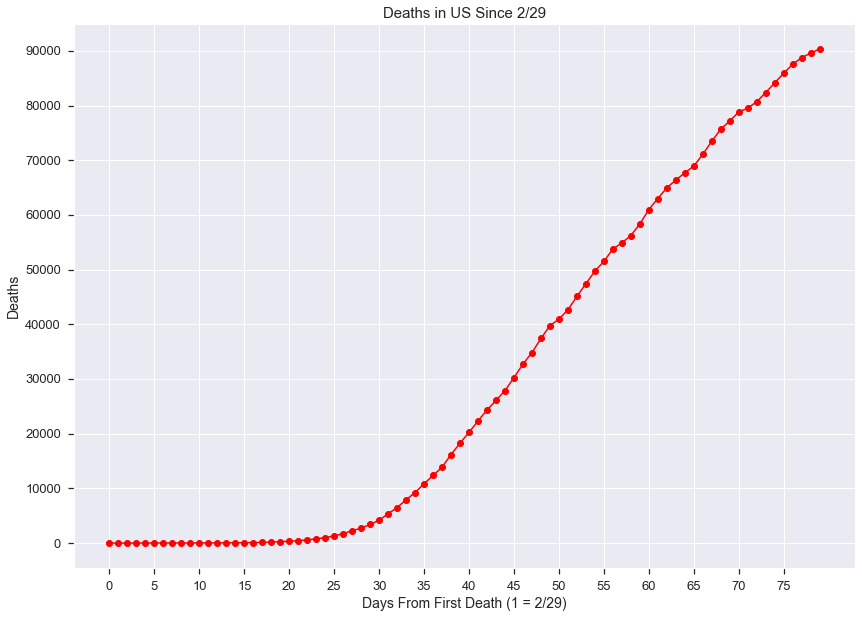

In [11]:
x = np.arange(0, len(us_trim))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, us_trim, color='red')
ax.plot(x, us_trim, color='red')
ax.set_xlabel('Days From First Death (1 = 2/29)', fontsize=14)
ax.set_ylabel('Deaths', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, max(us_trim), 10000))
ax.set_title('Deaths in US Since 2/29', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/us_deaths.jpeg')
plt.show()

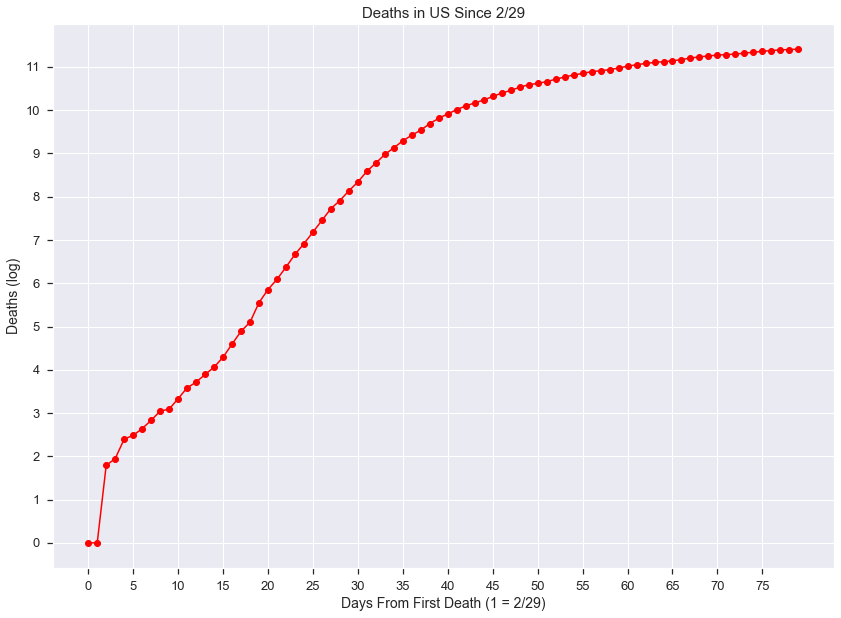

In [12]:
x = np.arange(0, len(us_trim_log))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, us_trim_log, color='red')
ax.plot(x, us_trim_log, color='red')
ax.set_xlabel('Days From First Death (1 = 2/29)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, max(us_trim_log), 1))
ax.set_title('Deaths in US Since 2/29', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/us_log_deaths.jpeg')
plt.show()

# South Korea

In [13]:
countries['south_korea'].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   2,   2,   6,   8,  10,  12,  13,  13,  16,
        17,  28,  28,  35,  35,  42,  44,  50,  53,  54,  60,  66,  66,
        72,  75,  75,  81,  84,  91,  94, 102, 111, 111, 120, 126, 131,
       139, 144, 152, 158, 162, 165, 169, 174, 177, 183, 186, 192, 200,
       204, 208, 211, 214, 217, 222, 225, 229, 230, 232, 234, 236, 237,
       238, 240, 240, 242, 243, 244, 246, 247, 248, 250, 250, 252, 254,
       255, 256, 256, 256, 256, 256, 258, 259, 260, 260, 262, 262, 263,
       263])

In [14]:
sk_trim = np.trim_zeros(np.squeeze(countries['south_korea']))
sk_trim.head()

2/20/20    1
2/21/20    2
2/22/20    2
2/23/20    6
2/24/20    8
Name: south_korea, dtype: int64

In [15]:
sk_trim_log = np.log(sk_trim)
sk_trim_log.head()

2/20/20    0.000000
2/21/20    0.693147
2/22/20    0.693147
2/23/20    1.791759
2/24/20    2.079442
Name: south_korea, dtype: float64

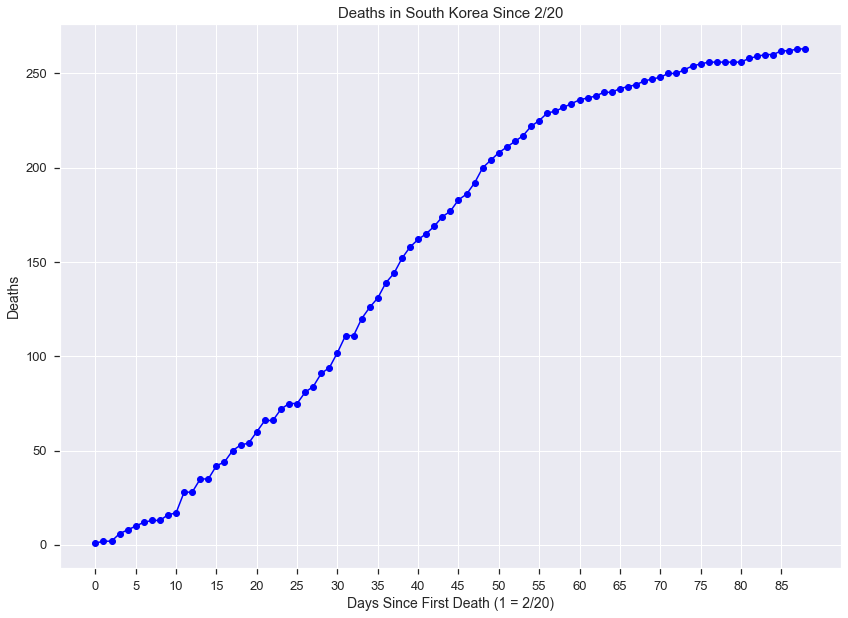

In [16]:
x = np.arange(0, len(sk_trim))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, sk_trim, color='blue')
ax.plot(x, sk_trim, color='blue')
ax.set_xlabel('Days Since First Death (1 = 2/20)', fontsize=14)
ax.set_ylabel('Deaths', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
#ax.set_yticks(np.arange(1, max(us_trim), 2))
ax.set_title('Deaths in South Korea Since 2/20', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/sk_deaths.jpeg')
plt.show()

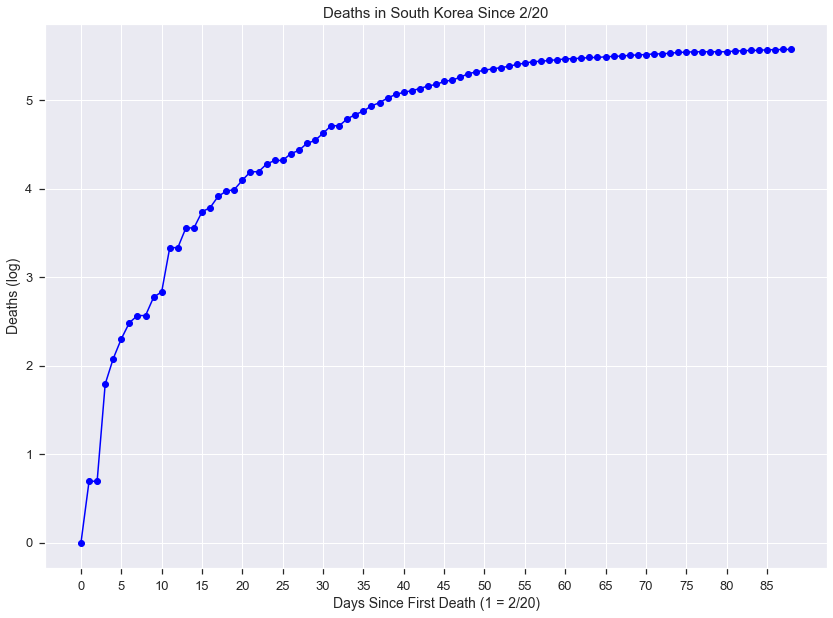

In [17]:
x = np.arange(0, len(sk_trim_log))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, sk_trim_log, color='blue')
ax.plot(x, sk_trim_log, color='blue')
ax.set_xlabel('Days Since First Death (1 = 2/20)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_title('Deaths in South Korea Since 2/20', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/sk_log_deaths.jpeg')
plt.show()

# Spain

In [18]:
countries['spain'].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,     2,     3,     5,
          10,    17,    28,    35,    54,    55,   133,   195,   289,
         342,   533,   623,   830,  1043,  1375,  1772,  2311,  2808,
        3647,  4365,  5138,  5982,  6803,  7716,  8464,  9387, 10348,
       11198, 11947, 12641, 13341, 14045, 14792, 15447, 16081, 16606,
       17209, 17756, 18056, 18708, 19315, 20002, 20043, 20453, 20852,
       21282, 21717, 22157, 22524, 22902, 23190, 23521, 23822, 24275,
       24543, 24543, 25100, 25264, 25428, 25613, 25857, 26070, 26299,
       26478, 26621, 26744, 26920, 27104, 27321, 27459, 27563, 27563,
       27709])

In [19]:
spain_trim = np.trim_zeros(np.squeeze(countries['spain']))
spain_trim.head()

3/3/20     1
3/4/20     2
3/5/20     3
3/6/20     5
3/7/20    10
Name: spain, dtype: int64

In [20]:
spain_trim_log = np.log(spain_trim)
spain_trim_log.head()

3/3/20    0.000000
3/4/20    0.693147
3/5/20    1.098612
3/6/20    1.609438
3/7/20    2.302585
Name: spain, dtype: float64

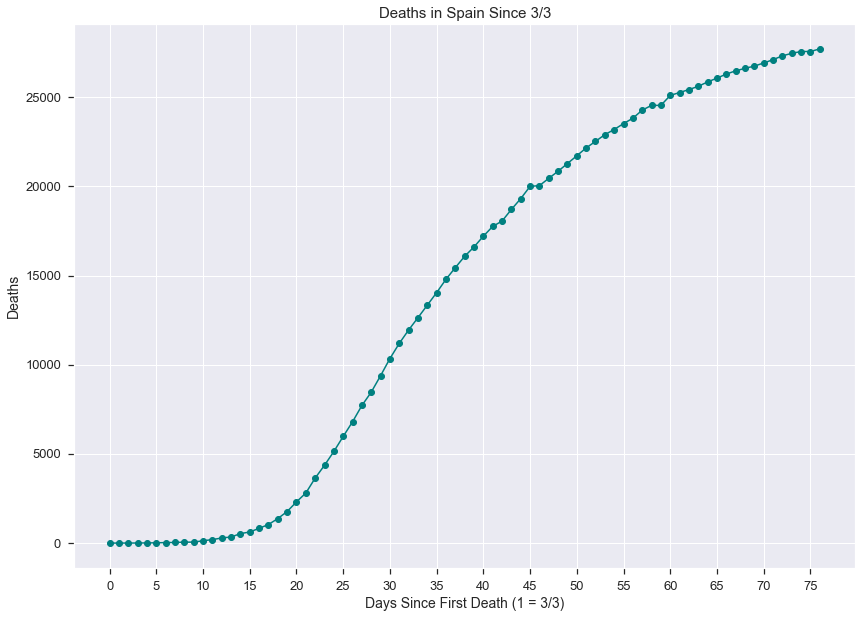

In [21]:
x = np.arange(0, len(spain_trim))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, spain_trim, color='teal')
ax.plot(x, spain_trim, color='teal')
ax.set_xlabel('Days Since First Death (1 = 3/3)', fontsize=14)
ax.set_ylabel('Deaths', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, max(spain_trim), 5000))
ax.set_title('Deaths in Spain Since 3/3', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/spain_deaths.jpeg')
plt.show()

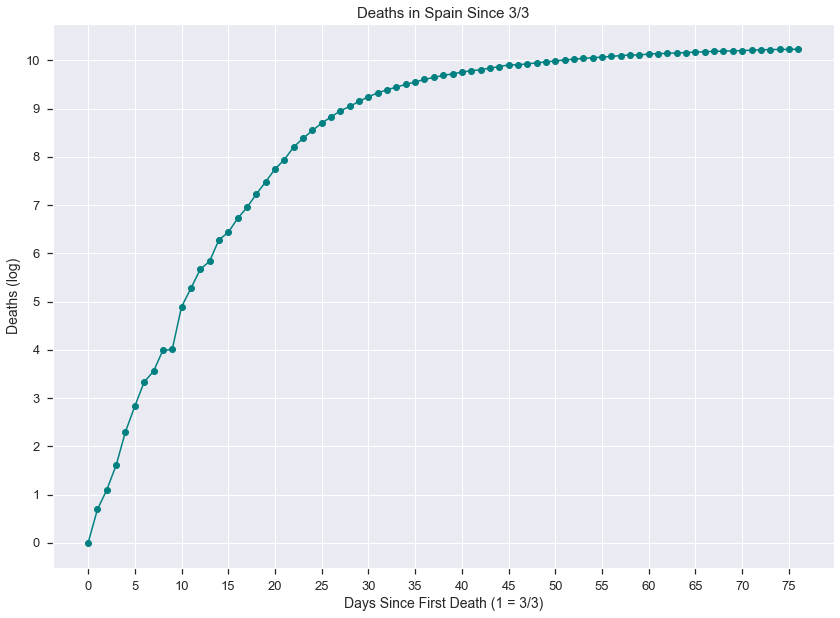

In [22]:
x = np.arange(0, len(spain_trim_log))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, spain_trim_log, color='teal')
ax.plot(x, spain_trim_log, color='teal')
ax.set_xlabel('Days Since First Death (1 = 3/3)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, max(spain_trim_log), 1))
ax.set_title('Deaths in Spain Since 3/3', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/spain_log_deaths.jpeg')
plt.show()

# Italy

In [23]:
countries['italy'].values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     2,     3,     7,    10,    12,
          17,    21,    29,    34,    52,    79,   107,   148,   197,
         233,   366,   463,   631,   827,   827,  1266,  1441,  1809,
        2158,  2503,  2978,  3405,  4032,  4825,  5476,  6077,  6820,
        7503,  8215,  9134, 10023, 10779, 11591, 12428, 13155, 13915,
       14681, 15362, 15887, 16523, 17127, 17669, 18279, 18849, 19468,
       19899, 20465, 21067, 21645, 22170, 22745, 23227, 23660, 24114,
       24648, 25085, 25549, 25969, 26384, 26644, 26977, 27359, 27682,
       27967, 28236, 28710, 28884, 29079, 29315, 29684, 29958, 30201,
       30395, 30560, 30739, 30911, 31106, 31368, 31610, 31763, 31908,
       32007])

In [24]:
italy_trim = np.trim_zeros(np.squeeze(countries['italy']))
italy_trim.head()

2/21/20     1
2/22/20     2
2/23/20     3
2/24/20     7
2/25/20    10
Name: italy, dtype: int64

In [25]:
italy_trim_log = np.log(italy_trim)
italy_trim_log.head()

2/21/20    0.000000
2/22/20    0.693147
2/23/20    1.098612
2/24/20    1.945910
2/25/20    2.302585
Name: italy, dtype: float64

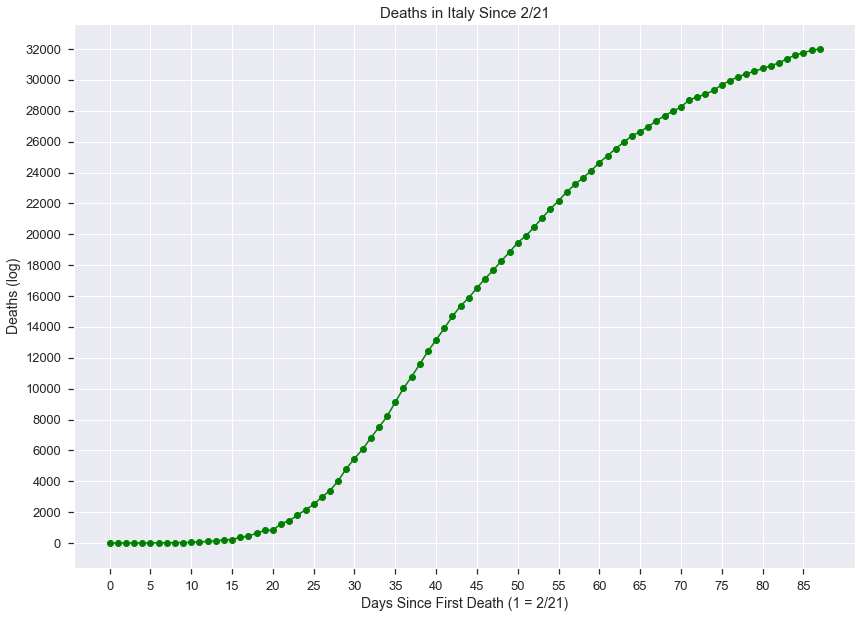

In [26]:
x = np.arange(0, len(italy_trim))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, italy_trim, color='green')
ax.plot(x, italy_trim, color='green')
ax.set_xlabel('Days Since First Death (1 = 2/21)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, max(italy_trim), 2000))
ax.set_title('Deaths in Italy Since 2/21', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/italy_deaths.jpeg')
plt.show()

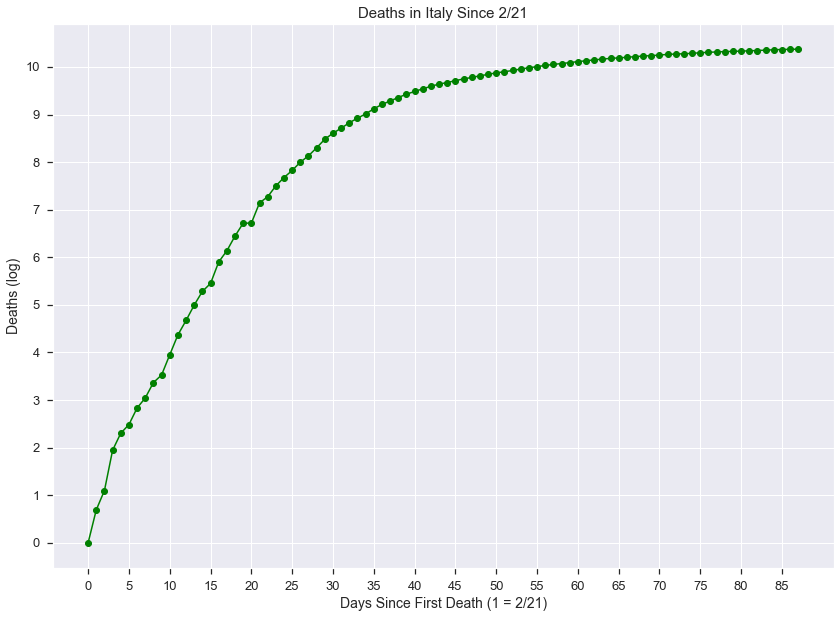

In [27]:
x = np.arange(0, len(italy_trim_log))
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x, italy_trim_log, color='green')
ax.plot(x, italy_trim_log, color='green')
ax.set_xlabel('Days Since First Death (1 = 2/21)', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, max(italy_trim_log), 1))
ax.set_title('Deaths in Italy Since 2/21', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/italy_log_deaths.jpeg')
plt.show()

# Comparison of all three countries

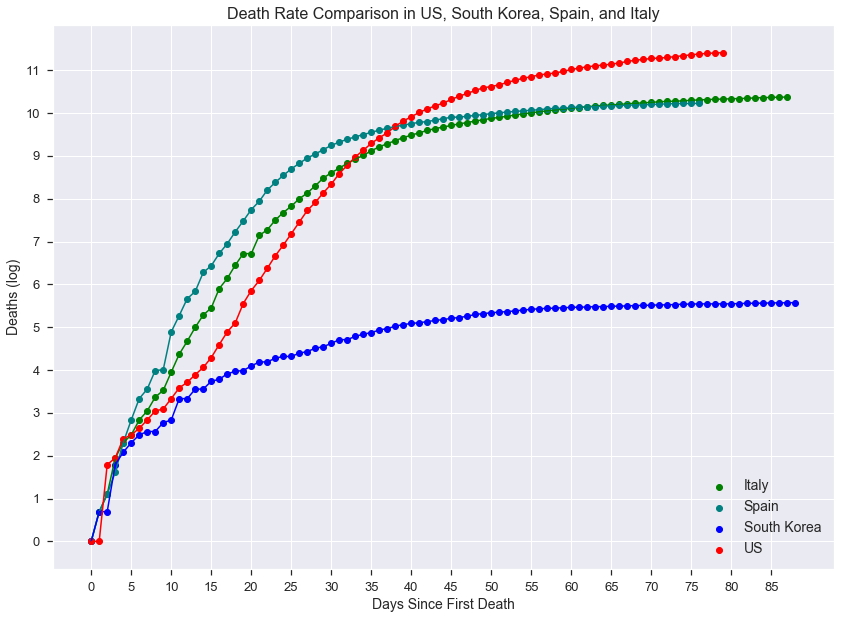

In [28]:
x_i = np.arange(0, len(italy_trim_log)).reshape(-1,1)
x_s = np.arange(0, len(spain_trim_log)).reshape(-1,1)
x_us = np.arange(0, len(us_trim_log)).reshape(-1,1)
x_sk = np.arange(0, len(sk_trim_log)).reshape(-1,1)
fig, ax = plt.subplots(figsize=(14,10))
ax.scatter(x_i, italy_trim_log, color='green', label='Italy')
ax.plot(x_i, italy_trim_log, color='green')
ax.scatter(x_s, spain_trim_log, color='teal', label='Spain')
ax.plot(x_s, spain_trim_log, color='teal')
ax.scatter(x_sk, sk_trim_log, color='blue', label='South Korea')
ax.plot(x_sk, sk_trim_log, color='blue')
ax.scatter(x_us, us_trim_log, color='red', label='US')
ax.plot(x_us, us_trim_log, color='red')
ax.set_xlabel('Days Since First Death', fontsize=14)
ax.set_ylabel('Deaths (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x), 5))
ax.set_yticks(np.arange(0, 11+1, 1))
ax.set_title('Death Rate Comparison in US, South Korea, Spain, and Italy', fontsize=16)
ax.legend(loc='lower right', prop={'size': 14})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
plt.savefig('/Users/Grant/Desktop/research/corona/deaths.jpeg')
plt.show()